In [2]:
%pylab
%matplotlib inline
import csv
from progress_bar import *
from copy import deepcopy
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
N1=N2=N3=2
h_set = []; para_set = []; initial_states_a = []; initial_states_b = []; final_states_a = []; final_states_b = []; band_set = []; energy_set =[];

Nb = 8
Nk = 1000
plabels = ["t","l","u","jk","j"]
L = 2*4*N1*N2*N3
N = 4*N1*N2*N3

def merge(array1,array2,dtype=int):
    len1 = array1.shape[0]
    len2 = array2.shape[0]
    array3 = zeros(len1+len2,dtype=dtype)
    for l in arange(0,len1+len2):
        if l < len1:
            array3[l] = array1[l]
        if l >= len1:
            array3[l] = array2[l-len1]
    return array3

def halffill_energy(h):
    w = numpy.linalg.eigvalsh(h)
    w = real(sort(w))
    hfe = sum(w[:int(w.shape[0]/2)])
    return hfe
    
seeds = merge(arange(0,30),arange(1000,1030), int)
Ns = seeds.shape[0]
multiplicity = []

for n in ["tlu_general","Y2Ir2O7","La2Ir2O7","new_ones"]:
    for t in merge(array([-0.525, 0.42, 0.53,-0.45]), arange(-1.0, 1.025, 0.25), float): 
        for j in array([0.0, 0.0001, 0.0002, 0.001]):
            for jk in array([0.0, 0.001, 0.002, 0.004, 0.0001]):
                for u in arange(0, 3.5, 0.5):
                    for lam in merge(array([0.13,-0.39,-0.21,0.15]), arange(-1.0, 1.025, 0.25), float):
                        h_seedset = []; para_seedset = []; band_seedset = []; initial_states_a_seed = []; initial_states_b_seed = []; final_states_a_seed = []; final_states_b_seed = []; energy_seed = [];
                        values_found = False

                        for seed in seeds:
                            try:
                                h_real = zeros((L,L), dtype=float32)
                                ext = '_'+str(N1)+str(N2)+str(N3)+'_'+'{:F}'.format(t)+'_'+'{:F}'.format(lam)+'_'+'{:F}'.format(j)+'_'+'{:F}'.format(jk)+'_'+'{:F}'.format(u)+"_"+str(seed)+'.csv'
#                                 print("Trying: " + ext)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/h_real'+ext) as file:
#                                     print("Opened: " + ext)
                                    reader = csv.reader(file, delimiter=',')
                                    l = 0
                                    for row in reader:
                                        if l < L:
                                            line = array(row)
                                            for k in arange(0,L):
                                                h_real[k,l] = line[k]
                                            l += 1
                                h_imag = zeros((L,L), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/h_imag'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    l = 0
                                    for row in reader:
                                        if l < L:
                                            line = array(row)
                                            for k in arange(0,L):
                                                h_imag[k,l] = line[k]
                                            l += 1
                                h = h_real+h_imag*1j

                                bands = zeros((Nb,Nk), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/bands'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    b = 0
                                    for row in reader:
                                        if b < Nb:
                                            bands[b,:] = array(row)[:Nk]
                                            b += 1

                                initial_state_a = zeros((N,3), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/initial_state_a'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    c = 0
                                    for row in reader:
                                        if c < N:
                                            initial_state_a[c,:] = array(row)[:3]
                                            c += 1
                                initial_state_b = zeros((N,3), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/initial_state_b'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    c = 0
                                    for row in reader:
                                        if c < N:
                                            initial_state_b[c,:] = array(row)[:3]
                                            c += 1
                                final_state_a = zeros((N,3), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/final_state_a'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    c = 0
                                    for row in reader:
                                        if c < N:
                                            final_state_a[c,:] = array(row)[:3]
                                            c += 1
                                final_state_b = zeros((N,3), dtype=float32)
                                with open('K:/code/pyrochlore_mft/phase diagram/'+n+'/final_state_b'+ext) as file:
                                    reader = csv.reader(file, delimiter=',')
                                    c = 0
                                    for row in reader:
                                        if c < N:
                                            final_state_b[c,:] = array(row)[:3]
                                            c += 1
                                h_seedset.append(h)
                                energy_seed.append(halffill_energy(h))
                                para_seedset.append([double(str(N1)+str(N2)+str(N3)),t,round(lam,2),u,jk,j])
                                band_seedset.append(bands)
                                
                                initial_states_a_seed.append(initial_state_a)
                                initial_states_b_seed.append(initial_state_b)
                                final_states_a_seed.append(final_state_a)
                                final_states_b_seed.append(final_state_b)
                                values_found = True
                            except:
                                0#print('Failed on: '+ ext)# t = '+str(t)+', lam = '+str(round(lam,2))+', u = '+str(u)+', jk = '+str(jk)+', j = '+str(j))
           
                        if values_found == True:
                            multiplicity.append(array(h_seedset).shape[0])
                        # Padding the lists so that they form an array
                            while array(h_seedset).shape[0] < Ns:
                                h_seedset.append(zeros(array(h_seedset)[0,:,:].shape))
                                para_seedset.append(zeros(array(para_seedset)[0,:].shape))
                                band_seedset.append(zeros(array(band_seedset)[0,:].shape))
                                energy_seed.append(0)
                                initial_states_a_seed.append(zeros(array(initial_states_a_seed)[0,:,:].shape))
                                initial_states_b_seed.append(zeros(array(initial_states_b_seed)[0,:,:].shape))
                                final_states_a_seed.append(zeros(array(final_states_a_seed)[0,:,:].shape))
                                final_states_b_seed.append(zeros(array(final_states_b_seed)[0,:,:].shape))
                            h_set.append(h_seedset)
                            para_set.append(para_seedset)
                            band_set.append(band_seedset)
                            energy_set.append(energy_seed)

                            initial_states_a.append(initial_states_a_seed)
                            initial_states_b.append(initial_states_b_seed)
                            final_states_a.append(final_states_a_seed)
                            final_states_b.append(final_states_b_seed)
                                
hamiltonians = array(h_set)
energies = array(energy_set)
parameters = array(para_set)
bands = array(band_set)
initial_states_a = array(initial_states_a)
initial_states_b = array(initial_states_b)
final_states_a = array(final_states_a)
final_states_b = array(final_states_b)
multiplicity = array(multiplicity)
Nd = hamiltonians.shape[0]
try:
    Ns = hamiltonians.shape[1]
except:
    Ns = 0

print("Number of parameter points: " +str(Nd)+", highest number of samples: " +str(Ns))

Number of parameter points: 336, highest number of samples: 60


In [ ]:
plot(multiplicity)

<h5>Let's build a $Y_2Ir_2O_7$ phase diagram.</h5>

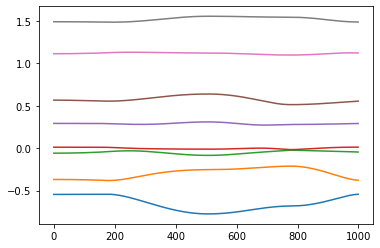

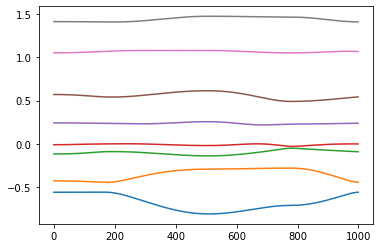

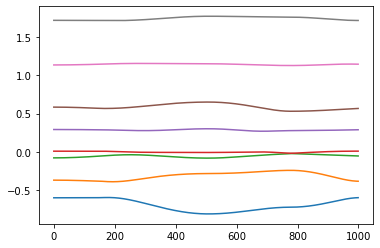

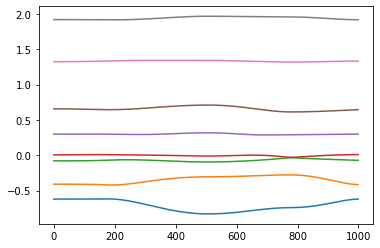

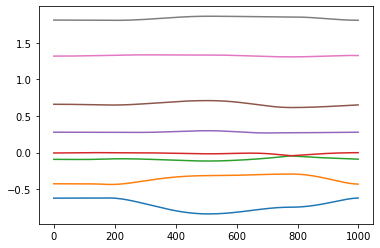

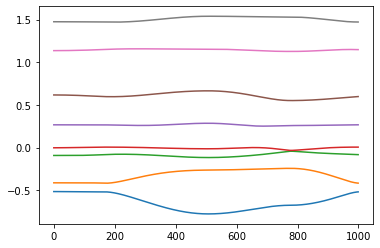

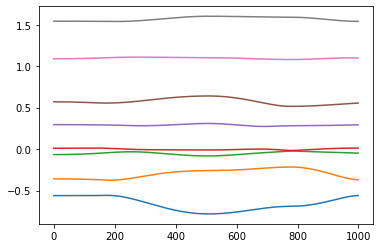

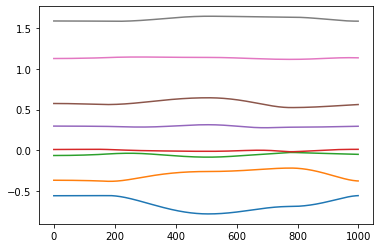

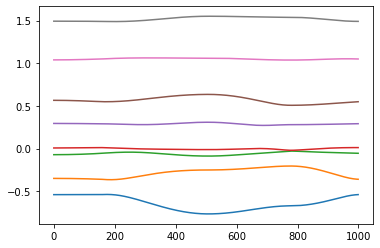

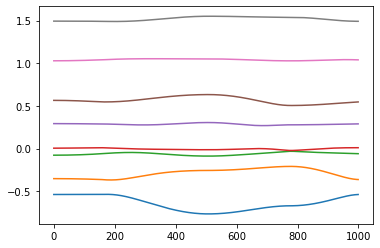

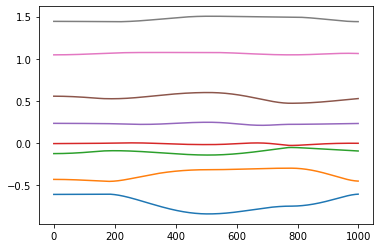

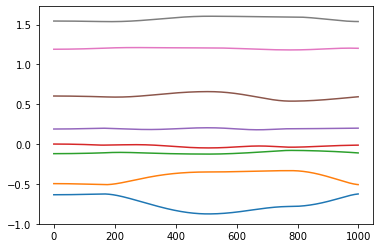

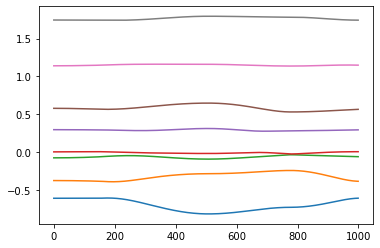

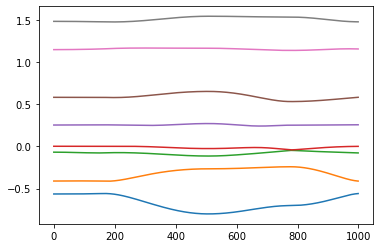

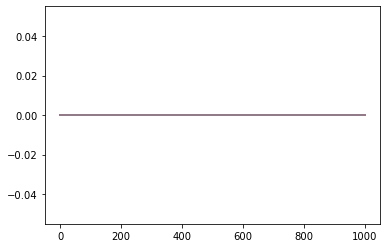

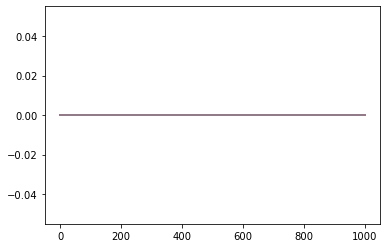

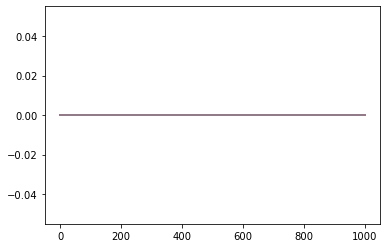

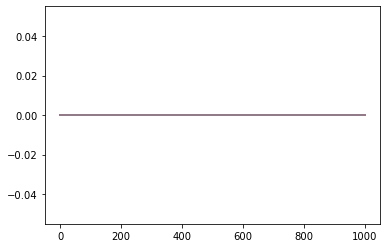

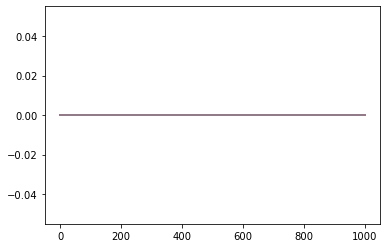

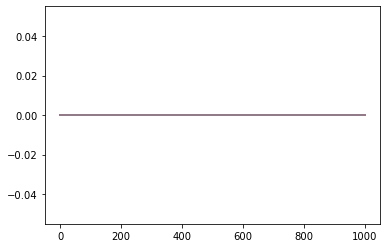

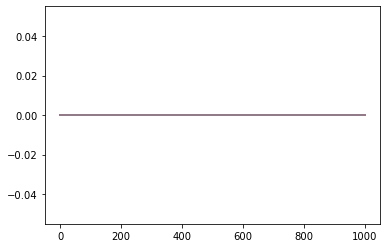

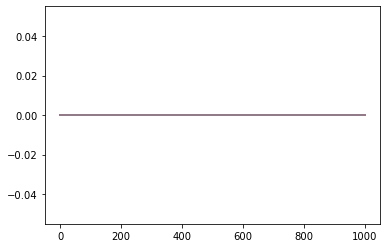

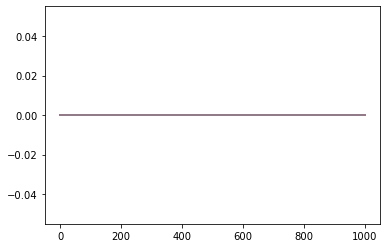

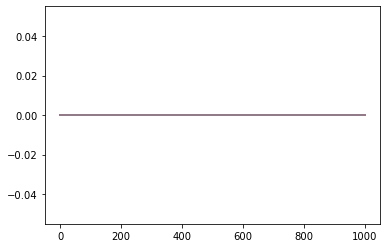

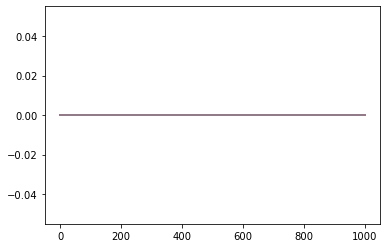

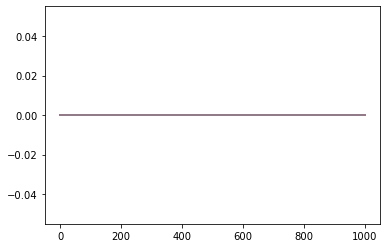

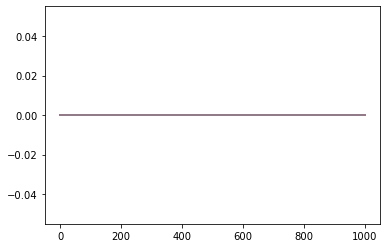

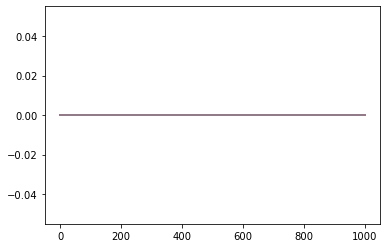

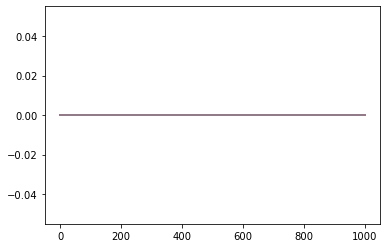

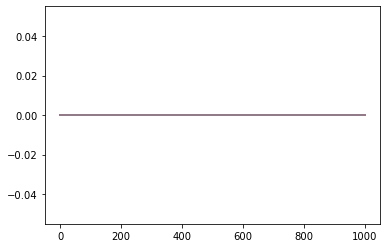

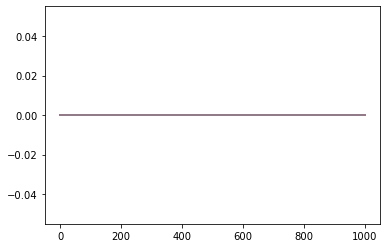

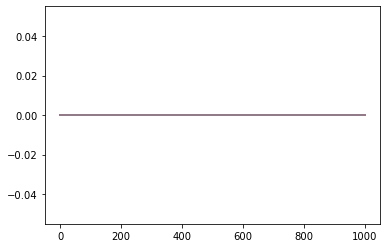

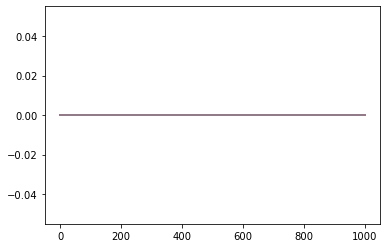

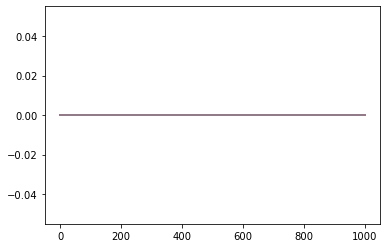

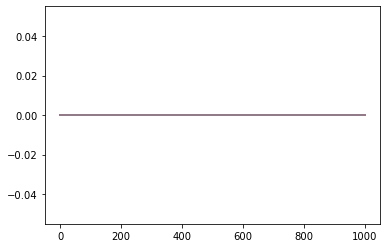

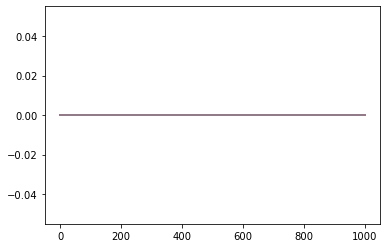

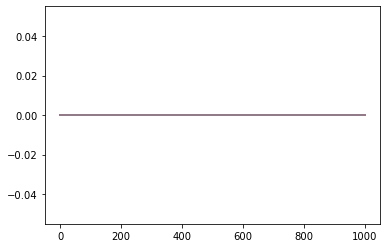

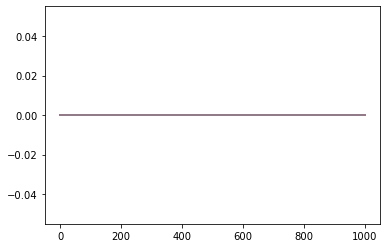

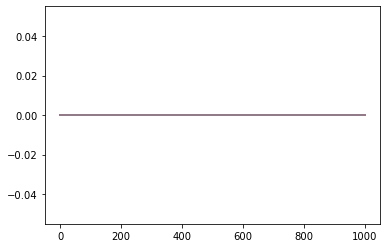

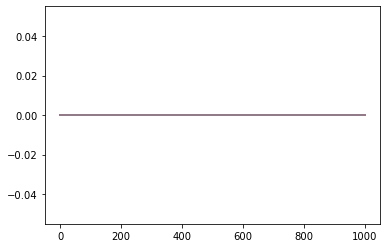

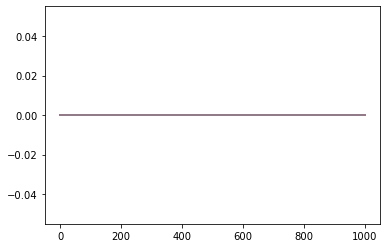

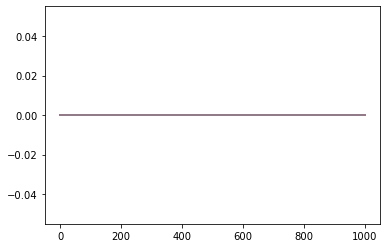

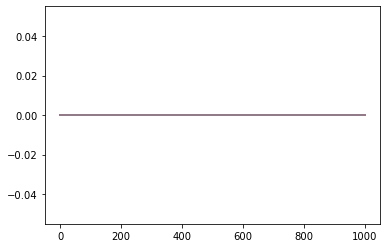

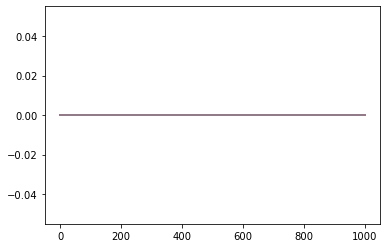

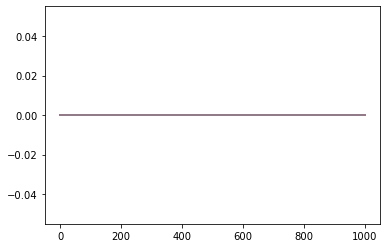

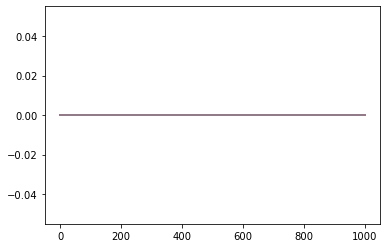

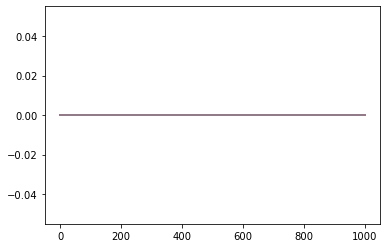

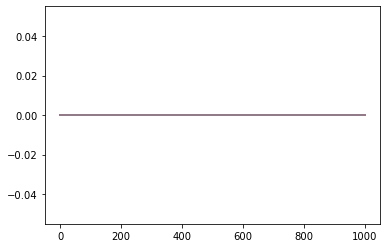

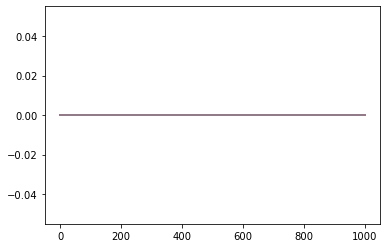

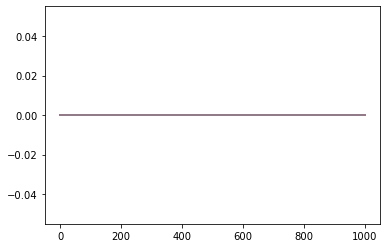

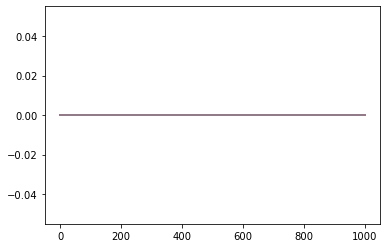

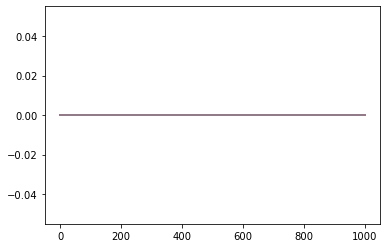

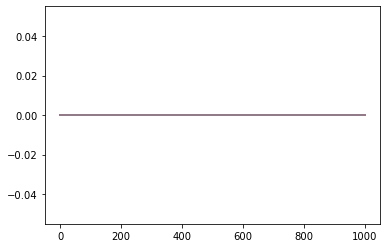

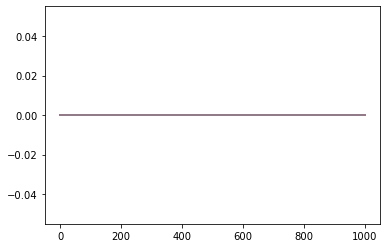

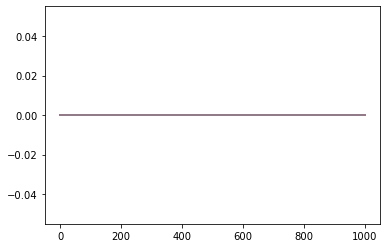

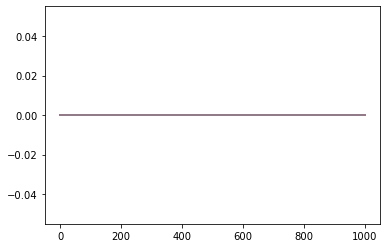

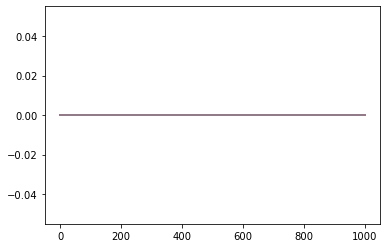

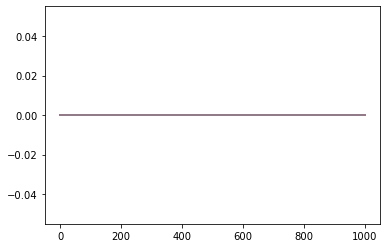

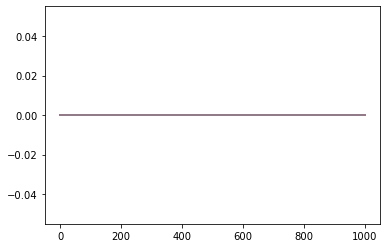

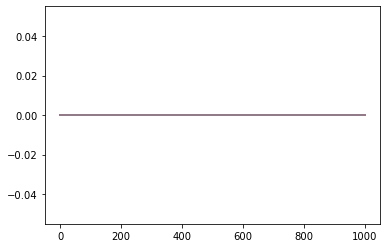

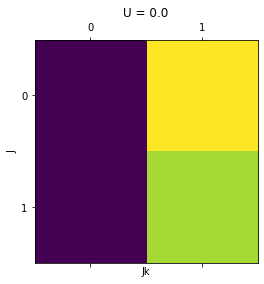

[[60. 60.]
 [60. 60.]]


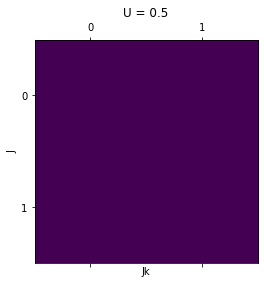

[[0. 0.]
 [0. 0.]]


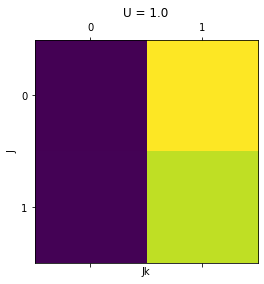

[[60. 60.]
 [60. 60.]]


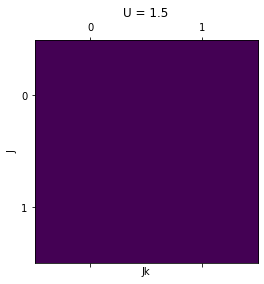

[[0. 0.]
 [0. 0.]]


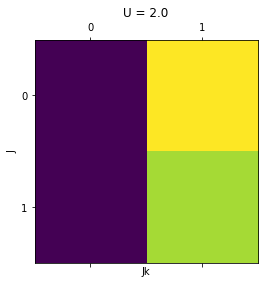

[[60. 60.]
 [60. 60.]]


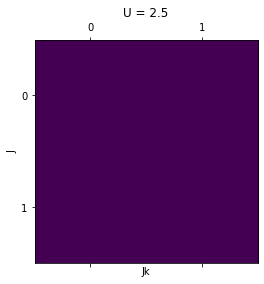

[[0. 0.]
 [0. 0.]]


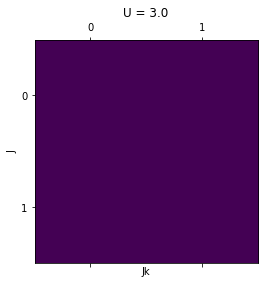

[[0. 0.]
 [0. 0.]]


In [5]:
ty = -0.525; ly = 0.13; uy = arange(0.0,3.5,0.5); jky = array([0.0,0.002]); jy = array([0.0,0.0001])
y2ir2o7 = np.zeros((7,2,2))
y2ir2o7_multiplicity = np.zeros((7,2,2))
for nu in range(0,7):
    for njk in range(0,2):
        for nj in range(0,2):
            for d in arange(0,Nd):
                if round(parameters[d,0,1],3) == ty and round(parameters[d,0,2],2) == ly and round(parameters[d,0,3],1) == uy[nu] and round(parameters[d,0,4],3) == jky[njk] and round(parameters[d,0,5],4) == jy[nj]:
                    for s in range(0,3):
                        y2ir2o7[nu, njk, nj] += np.min(bands[d,s,4,:])-np.max(bands[d,s,3,:])
                        y2ir2o7_multiplicity[nu,njk,nj] += 1
                        if nu == 2 and njk == 1 and nj == 1:
                            for b in range(0,8):
                                plot(bands[d,s,b,:])
                            show()
    
for nu in range(0,7):
#     fig, ax = subplots(1,2)
    matshow(y2ir2o7[nu,:,:])
    title("U = " + str(uy[nu]))
    xlabel("Jk")
    ylabel("J")
    show()
    print(y2ir2o7_multiplicity[nu,:,:])

In [ ]:
# Calculating the Density of States in k-space
spectra = zeros((Nd,Ns,101,L))
energyrange = arange(-0.1,0.102,0.002)

for d in arange(0,10): #Nd):
    time0 = time.time()
    for s in arange(0,Ns):
        n = zeros((101,L))
        n_w = zeros((101,L,L))

        c = 0
        for w in energyrange:
            n_w[c,:,:] = -2*imag(numpy.linalg.inv(w*identity(L)-hamiltonians[d,s,:,:]+1j*0.00001*identity(L)))
            progress(c,101,time0)
            c += 1

        for r in arange(0,L):
            n[:,r] = n_w[:,r,r]
        spectra[d,s,:,:] = n
    progress(d+1,Nd,time0)

In [ ]:
# Plot some spectra
for d in arange(0,Nd):
    for s in arange(0,Ns):
        print("Data "+str(d)+"-"+str(s)+': t = '+str(parameters[d,s,1])+', lam = '+str(parameters[d,s,2])+', u = '+str(parameters[d,s,3])+', jk = '+str(parameters[d,s,4])+', j = '+str(parameters[d,s,5]))
        plot(energyrange,spectra[d,s,:,0])
        show()

In [ ]:
#Let's take this STM to real-space.

#Transcribe from i to (n1,n2,n3,mu).
def iton(i):
    mu = int(i/(N1*N2*N3))
    i = i - mu*(N1*N2*N3)
    n3 = int(i/(N1*N2))
    i = i - n3*(N1*N2)
    n2 = int(i/(N1))
    i = i - n2*(N1)
    n1 = i
    v = array([n1,n2,n3,mu])

    return v

#Transcribe from (n1,n2,n3,mu) to real space.
def ntor(v, sitetype = "B"):
    a = 1.0;
    n1,n2,n3,mu = v[0],v[1],v[2],v[3]

    if(sitetype=="A"):
        a1=array([0,0.5*a,0.5*a])
        a2=array([0.5*a,0.0,0.5*a])
        a3=array([0.5*a,0.5*a,0.0])
        d1,d2,d3,d4 = 0.5*(a2+a3),0.5*(a3+2.0*a2-a1),0.5*(2.0*a3+a2-a1),0.5*(a3+a2-a1)
    if (sitetype=="B"):
        a1=array([0.0,0.5*a,0.5*a])
        a2=array([0.5*a,0.0,0.5*a])
        a3=array([0.5*a,0.5*a,0.0])
        d1,d2,d3 = 0.5*a1,0.5*a2,0.5*a3
        d4=array([0,0,0])
    if (mu==0):
        dmu = d4
    elif (mu==1):
        dmu = d1
    elif (mu==2):
        dmu = d2
    elif (mu==3):
        dmu = d3

    r = n1*a1 + n2*a2 + n3*a3 + dmu

    return r

def itor(i):
    return ntor(iton(i))

### Establish spin sites ###
pos = zeros((int(L/2),3))
for r in arange(0,int(L/2)):
    pos[r,:] = itor(r)
    
### Building Reference Spin States ###
ref_states = []
No = 12

for n in arange(0,No):
    state = zeros((32,3))
    for i in arange(0,32):
        if n == 0:
            a = 1; b = 1; c = 1; d = 1;
        if n == 1:
            a = 1; b = -1; c = 1; d = -1;
        if n == 2:
            a = 1; b = -1; c = -1; d = 1;
        if n == 3:
            a = -1; b = -1; c = 1; d = 1;
        if n == 4:
            a = -1; b = 1; c = -1; d = 1;
        if n == 5:
            a = 1; b = 1; c = -1; d = -1;
        if n == 6:
            a = -1; b = 1; c = 1; d = -1;
        if n == 7:
            a = -1; b = 1; c = 1; d = 1;
        if n == 8:
            a = 1; b = -1; c = 1; d = 1;
        if n == 9:
            a = 1; b = 1; c = -1; d = 1;
        if n == 10:
            a = 1; b = 1; c = 1; d = -1;
        mu = int(i/(N1*N2*N3))
        if mu == 0:
            state[i,:] = a*(27**-0.5)*array([1,1,1])
        if mu == 1:
            state[i,:] = b*(27**-0.5)*array([1,-1,-1])
        if mu == 2:
            state[i,:] = c*(27**-0.5)*array([-1,1,-1])
        if mu == 3:
            state[i,:] = d*(27**-0.5)*array([-1,-1,1])
        if n == 11:
            state[i,:] = (27**-0.5)*array([1,1,1])
    ref_states.append(state)
    
ref_states = array(ref_states).reshape(No,96)

In [ ]:
X = Y = 4
mp = max(pos[:,2])
Gmaps = zeros((Nd,Ns,101,X,Y))
time0 = time.time()
for d in arange(0,Nd):
    for s in arange(0,Ns):
        for r in arange(0,int(L/2)):
            #if pos[r,2] == mp:
            Gmaps[d,s,:,int(-0.5+X*100*pos[r,0]/(100*mp)),int(-0.5+Y*100*pos[r,1]/(100*mp))] += (pos[r,2]/mp)*spectra[d,s,:,r]
    progress(d+1,Nd,time0)

In [ ]:
for e in arange(0,101,10):
    print(str(energyrange[e])+" eV")
    matshow(Gmaps[0,0,e,:,:])
    show()

In [ ]:
#Let's add some thermal broadening with a Gaussian Convolution
#Width-at-half-maximum is approximately k_B*T
k_B = 8.617333262145*10**-5 # eV/K

def Gaussian(a,b,c,x):
    y = zeros(x.shape[0])
    for r in arange(0,x.shape[0]):
        y[r] = a*(e**-(((x[r]-b)**2)/(2*(c**2))))
    return y

def Lorentzian(a,r0,w,x):
    y = zeros(x.shape[0])
    for r in arange(0,x.shape[0]):
        W = (r0-x[r])/(w/2)
        y[r] = a/(1+W**2)
    return y

def ThermalBroadening(A,x,T,typ="Gauss"):
    y = zeros(A.shape[0])
    for r in arange(0,A.shape[0]):
        if typ == "Gauss":
            B = Gaussian(1,x[r],k_B*T,x)
        if typ == "Lorentz":
            B = Lorentzian(1,x[r],k_B*T,x)
        for p in arange(0,A.shape[0]):
            y[r] += A[p]*B[p]
    return y

In [ ]:
for d in arange(0,10): #Nd):
    print("Data "+str(d)+': t = '+str(para_set[d,1])+', lam = '+str(para_set[d,2])+', j = '+str(para_set[d,3])+', jk = '+str(para_set[d,4])+', u = '+str(para_set[d,5]))
    plot(energyrange,Gmaps[d,:,1,1]/max(Gmaps[d,:,1,1]))
    show()
    plot(energyrange,ThermalBroadening(Gmaps[d,:,1,1],energyrange,33,"Gauss")/max(Gmaps[d,:,1,1]))
    show()

In [ ]:
Gmaps_T = zeros(Gmaps.shape)
for d in arange(0,10): #Nd):
    for i in arange(0,X):
        for j in arange(0,Y):
            if max(Gmaps[d,:,i,j]) != 0:
                Gmaps_T[d,:,i,j] = ThermalBroadening(Gmaps[d,:,i,j],energyrange,500,"Lorentz")/max(Gmaps[d,:,i,j])

Let's consider spatial thermal broadening more carefully. What are the meanings of X and Y again?

On to the phase diagrams!

In [ ]:
#Phase Diagram based on a single site's density of states at the Fermi energy
pd_lamu = zeros((11,11))
counts = zeros(pd_lamu.shape)

for d in arange(0,Nd):
    if para_set[d,1] == 0.5 and para_set[d,3] == 0.0 and para_set[d,4] == 0.0:
        i = int(round(10*para_set[d,2]/-0.4))
        j = int(round(10*para_set[d,5]/6))
        pd_lamu[i,j] += n_set[d,51,0]
        counts[i,j]+=1
        
for i in arange(0,pd_lamu.shape[0]):
    for j in arange(0,pd_lamu.shape[1]):
        if counts[i,j] != 0:
            pd_lamu[i,j] /= counts[i,j]
            
fig, ax = subplots()
cax = ax.matshow(pd_lamu)
fig.colorbar(cax)
ax.set_title("Phase Diagram: Lambda vs U")
ax.set_xticklabels([' ', '0.0'  , '-0.05', '-0.1' , '-0.15', '-0.2' , '-0.25', '-0.3' , '-0.35','-0.40'])
ax.set_yticklabels([' ', '0.0' , '0.5', '1.' , '1.5', '2.' , '2.5', '3.' , '3.5', '4.' , '4.5', '5.' , '5.5', '6.' ])
print(sum(counts.reshape(-1)))

In [ ]:
pd_jku = zeros((11,11))
counts = zeros(pd_jku.shape)

for d in arange(0,Nd):
    if para_set[d,1] == 0.5 and para_set[d,2] == -0.2 and para_set[d,4] == para_set[d,3]:
        i = int(10*para_set[d,3]/0.4)
        j = int(10*para_set[d,5]/6)
        pd_jku[i,j] += n_set[d,51,0]
        counts[i,j]+=1
        
for i in arange(0,pd_jku.shape[0]):
    for j in arange(0,pd_jku.shape[1]):
        if counts[i,j] != 0:
            pd_jku[i,j] /= counts[i,j]
            
fig, ax = subplots()
cax = ax.matshow(pd_jku)
fig.colorbar(cax)
ax.set_title("Phase Diagram: Jk vs U")
print(sum(counts.reshape(-1)))

In [ ]:
pd_jkj = zeros((9,9))
counts = zeros(pd_jkj.shape)

for d in arange(0,Nd):
    if para_set[d,1] == 0.5 and para_set[d,2] == -0.2:# and para_set[d,5] == 0.0:
        i = int(round(8*para_set[d,3]/0.4))
        j = int(round(8*para_set[d,4]/0.4))
        pd_jkj[i,j] += n_set[d,51,33]
        counts[i,j]+=1
        
for i in arange(0,pd_jkj.shape[0]):
    for j in arange(0,pd_jkj.shape[1]):
        if counts[i,j] != 0:
            pd_jkj[i,j] /= counts[i,j]
            
fig, ax = subplots()
cax = ax.matshow(pd_jkj)
fig.colorbar(cax)
ax.set_title("Phase Diagram: Jk vs J")
ax.set_xticklabels([ ' ','0.'  , '-0.05', '-0.1' , '-0.15', '-0.2' , '-0.25', '-0.3' , '-0.35','-0.40'])
ax.set_yticklabels([ ' ','0.'  , '-0.05', '-0.1' , '-0.15', '-0.2' , '-0.25', '-0.3' , '-0.35','-0.40'])
ax.xaxis.set_ticks_position('bottom')
print(sum(counts.reshape(-1)))

In [ ]:
pd_tlam = zeros((11,9))
counts = zeros(pd_tlam.shape)

for d in arange(0,Nd):
    if para_set[d,3] == 0.0 and para_set[d,4] == 0.0 and para_set[d,5] == 0.0:
        i = int(10*para_set[d,1]/0.5)
        j = int(8*para_set[d,2]/-0.4)
        pd_tlam[i,j] += n_set[d,51,0]
        counts[i,j]+=1
        
for i in arange(0,pd_tlam.shape[0]):
    for j in arange(0,pd_tlam.shape[1]):
        if counts[i,j] != 0:
            pd_tlam[i,j] /= counts[i,j]
            
fig, ax = subplots()
cax = ax.matshow(pd_tlam)
fig.colorbar(cax)
ax.set_title("Phase Diagram: t vs Lambda")
ax.set_yticklabels([ ' ' , '0.0' , '-0.10' , '0.2' , '0.3' ,'0.4','0.5'])
ax.set_xticklabels([ ' ', '0.0'  , '-0.05', '-0.1' , '-0.15', '-0.2' , '-0.25', '-0.3' , '-0.35','-0.40'])
ax.xaxis.set_ticks_position('bottom')
print(sum(counts.reshape(-1)))

Note that these are local state densities, charge order can be infered.

Maybe I should import the band structures into this notebook as well. I could also generate band structures based on the Hamiltonian. 

Dare I consider porting PyIr from C++ to Python? No, this would take longer than week's time I think. I'll stick to the idea of beginning from the Hamiltonian and spin configurations for now.

I've got to do some analysis on the input and output spin states. I've got to import those states in some orderly manner. Can I generate those spin states with the current functionality of the C++ code? Yes.

In [ ]:
for d in arange(0,Nd):
    #if parameters[d,1] == 0.42 and parameters[d,2] == -0.39:
    print("Data " +str(d)+":   t = " + str(parameters[d,1]) + ", lambda = " + str(parameters[d,2]) + ", U = " + str(parameters[d,3]) + ", Jk = " + str(parameters[d,4]) + ", J = " + str(parameters[d,5]))
    
    alig_list = []
    for o in arange(0,No):
        alig = abs(dot(labeled_states[o,:],states_fd[d,:]))
        alig_list.append(alig)
    if max(array(alig_list)) < 7:
        print("Complex:  Alignment = " + str(max(array(alig_list))))
    elif argmax(array(alig_list)) == 0:
        print("AiAo:     Alignment = " + str(max(array(alig_list))))
    elif argmax(array(alig_list)) in arange(1,7):
        print("2i2o:     Alignment = " + str(max(array(alig_list))))
    elif argmax(array(alig_list)) in arange(7,11):
        print("3i1o:     Alignment = " + str(max(array(alig_list))))
    elif argmax(array(alig_list)) == 11:
        print("Ferro:    Alignment = " + str(max(array(alig_list))))
    else:
        print("dunno")
    
    gap = min(bands[d,4,:])-max(bands[d,3,:])
    print("Gap = " +str(gap)+" eV\n\n")
    
    if max(array(alig_list)) > 3:

        x = zeros(4*N1*N2*N3) # Never-ever chain equalities in Python!
        y = zeros(4*N1*N2*N3)
        z = zeros(4*N1*N2*N3)
        u0 = zeros(4*N1*N2*N3)
        v0 = zeros(4*N1*N2*N3)
        w0 = zeros(4*N1*N2*N3)
        u1 = zeros(4*N1*N2*N3)
        v1 = zeros(4*N1*N2*N3)
        w1 = zeros(4*N1*N2*N3)
        poslen = 1
        spinlen = 0.3

        for i in arange(0,4*N1*N2*N3):
            x[i] = poslen * pos[i,0]
            y[i] = poslen * pos[i,1]
            z[i] = poslen * pos[i,2]
            u0[i] = spinlen * initial_states[d,i,0]
            v0[i] = spinlen * initial_states[d,i,1]
            w0[i] = spinlen * initial_states[d,i,2]
            u1[i] = spinlen * final_states[d,i,0]
            v1[i] = spinlen * final_states[d,i,1]
            w1[i] = spinlen * final_states[d,i,2]

        #x, y, z = meshgrid(x,y,z)

        #M0 = abs(dot(initial_states[d,:,:].reshape(-1),final_states[5,:,:].reshape(-1)))
        #M1 = abs(dot(final_states[d,:,:].reshape(-1),final_states[5,:,:].reshape(-1)))

        fig = figure()

        ax = fig.add_subplot(2, 3, 1, projection='3d')
        ax.quiver(x, y, z, u0, v0, w0)
        ax._axis3don = False
        ax.set_title("Initial State")# \n" + str(M0))

        ax = fig.add_subplot(2, 3, 2, projection='3d')
        ax.quiver(x, y, z, u1, v1, w1)
        ax._axis3don = False
        ax.set_title("Final State")# \n" + str(M1))

        ax = fig.add_subplot(2,1,2)
        for b in arange(0,Nb):
            ax.plot(bands[d,b,:])
        ax.set_aspect('auto')
        xticks([0, 157, 507, 781, 1000], ["X", "W", "\u0393", "L", "W"])
        ax.set_title("Band Structure")

        show()
        print("###############################################################\n\n")

In [11]:
#Compiling the Phase Diagram from the Data Available

Nt = 21; t_max = 0.6; t_min = 0.4; dt = (t_max-t_min)/(Nt-1)   # for t in arange(0.4,0.61,0.1):
Nl = 31; l_max = -0.2; l_min = -0.5; dl = (l_max-l_min)/(Nl-1)   # for lam in arange(-0.0,-0.45,-0.1):
Nu = 13; u_max = 3.0; u_min = 0.0; du = (u_max - u_min)/(Nu-1)   # for u in arange(0.0,10.1,0.5):
Njk = 11; jk_max = 0.10; jk_min = 0.0; djk = (jk_max - jk_min)/(Njk-1) # for jk in arange(0.0,0.151,0.01):
Nj = 11; j_max = 0.10; j_min = 0.0; dj = (j_max-j_min)/(Nj-1)  # for j in arange(0.0,0.151,0.01):
phase_diagram = zeros((Nt,Nl,Nu,Njk,Nj))
for d in arange(0,Nd):
    try:
        gap = min(bands[d,4,:])-max(bands[d,3,:])
        #print(gap)
        #Exclusive, Metal (gap < 10 meV), Small-Gap Insulator, or Insulator (gap > 35 meV)
        if gap > 0.05:
            gap = 1
        elif gap > 0.01:
            gap = 0.5
        else:
            gap = 0.25
        
        phase_diagram[int(round((Nt-1)*(parameters[d,1]-t_min)/(t_max-t_min))),
                      int(round((Nl-1)*(l_max-parameters[d,2])/(l_max-l_min))),
                      int(round((Nu-1)*(parameters[d,3]-u_min)/(u_max-u_min))),
                      int(round((Njk-1)*(parameters[d,4]-jk_min)/(jk_max-jk_min))),
                      int(round((Nj-1)*(parameters[d,5]-j_min)/(j_max-j_min))) ] = gap
    except:
        0

In [6]:
# Plotting Some of the U-Jk Phase Diagram Slices
for j in array([0,10]): #arange(0,Nj):
    print("\nj = " + str(j_min + dj*j) + "\n#########################################################")
    for t in array([]): #arange(0,Nt):
        print("\nt = " + str(t_min + dt*t) + "\n#########################################################")
        for l in array([4]): #arange(0,Nl):
            fig = figure()
            ax = fig.add_subplot()
            ax.matshow(phase_diagram[t,l,:,:,j].T,origin="lower")
            ax.set_title("Phase Diagram: U vs Jk \n t = " + str(t_min + dt*t) + ", l = " + str(round(l_max - dl*l,2)) + ", J = " + str(j_min + dj*j))
            ax.set_xlabel("U (eV)")
            ax.set_xticklabels(arange(u_min,u_max+0.001,1.0))
            ax.set_xticks(arange(0,Nu,2))
            ax.set_ylabel("Jk (eV)")
            ax.set_yticklabels(arange(jk_min,jk_max+0.001,0.02))
            ax.set_yticks(arange(0,Njk,2))
            ax.xaxis.set_ticks_position("bottom")
            show()


j = 0.0
#########################################################

j = 0.1
#########################################################



j = 0.0
#########################################################

jk = 0.0
#########################################################


<ipython-input-12-dfa7428d3c81>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(arange(t_min,t_max+0.001,0.1))
<ipython-input-12-dfa7428d3c81>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(arange(u_min,u_max+0.001,1.0))


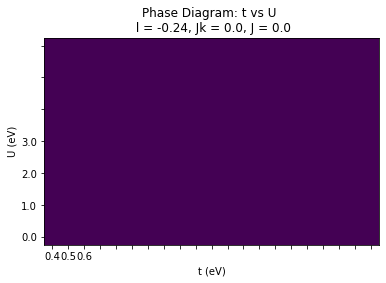


jk = 0.1
#########################################################


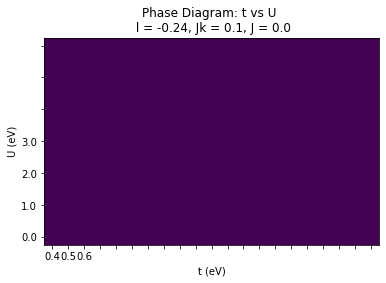


j = 0.1
#########################################################

jk = 0.0
#########################################################


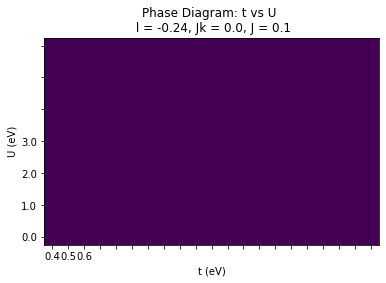


jk = 0.1
#########################################################


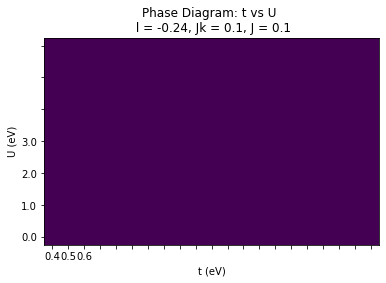

In [12]:
# Plotting Some of the t-U Phase Diagram Slices
for j in array([0,10]): #arange(0,Nj):
    print("\nj = " + str(j_min + dj*j) + "\n#########################################################")
    for jk in array([0,10]): #arange(0,Njk):
        print("\njk = " + str(jk_min + djk*jk) + "\n#########################################################")
        for l in array([4]): #arange(0,Nl):
            fig = figure()
            ax = fig.add_subplot()
            ax.matshow(phase_diagram[:,l,:,jk,j].T,origin="lower")
            ax.set_title("Phase Diagram: t vs U \n l = " + str(round(l_max - dl*l,2)) + ", Jk = " + str(jk_min + djk*jk) + ", J = " + str(j_min + dj*j))
            ax.set_xlabel("t (eV)")
            ax.set_xticklabels(arange(t_min,t_max+0.001,0.1))
            ax.set_xticks(arange(0,Nt,1))
            ax.set_ylabel("U (eV)")
            ax.set_yticklabels(arange(u_min,u_max+0.001,1.0))
            ax.set_yticks(arange(0,Nu,2))
            ax.xaxis.set_ticks_position("bottom")
            show()


t = 0.53
#########################################################

l = -0.21
#########################################################


<ipython-input-8-61e20d0fb01f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(arange(j_min,j_max+0.001,0.02))
<ipython-input-8-61e20d0fb01f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(arange(jk_min,jk_max+0.001,0.02))


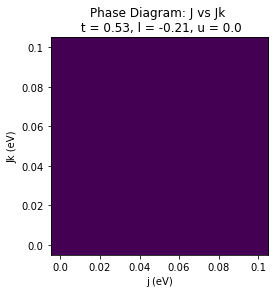

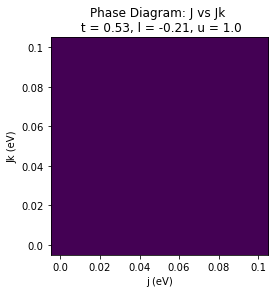

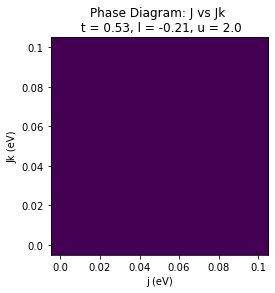

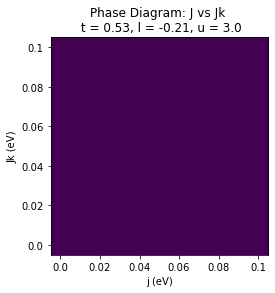

In [8]:
# Plotting Some of the J-Jk Phase Diagram Slices
for t in array([13]): #arange(0,Nt): Y(2,19) La(13,1)
    print("\nt = " + str(round(t_min + dt*t,2)) + "\n#########################################################")
    for l in array([1]): #arange(0,Nl):
        print("\nl = " + str(round(l_max - dl*l,2)) + "\n#########################################################")
        for u in arange(0,Nu,4):
            fig = figure()
            ax = fig.add_subplot()
            ax.matshow(phase_diagram[t,l,u,:,:].T,origin="lower")
            ax.set_title("Phase Diagram: J vs Jk \n t = " + str(round(t_min + dt*t,2)) + ", l = " + str(round(l_max - dl*l,2)) + ", u = " + str(u_min + du*u))
            ax.set_xlabel("j (eV)")
            ax.set_xticklabels(arange(j_min,j_max+0.001,0.02))
            ax.set_xticks(arange(0,Nj,2))
            ax.set_ylabel("Jk (eV)")
            ax.set_yticklabels(arange(jk_min,jk_max+0.001,0.02))
            ax.set_yticks(arange(0,Njk,2))
            ax.xaxis.set_ticks_position("bottom")
            show()

To analysis the statistics of the space of states we need to be able to categorize spin configurations. We could do this using vector analysis or machine learning. Let's do it the fun way. Nope, too nebulous, the direct method wins out. Vector analysis it is.

In [9]:
for d in arange(0,Nd):
    for s in arange(0,Ns):
        print("Data " +str(d)+"-"+str(s)+":  t = " + str(parameters[d,0,1]) + ", lambda = " + str(parameters[d,0,2]) + ", U = " + str(parameters[d,0,3]) + ", Jk = " + str(parameters[d,0,4]) + ", J = " + str(parameters[d,0,5]))
        order_similarity = []
        ini_flat = initial_states_b[d,s,:].reshape(3*N)
        fin_flat = final_states_b[d,s,:].reshape(3*N)
        for o in arange(0,No):
            sim = abs(dot(ref_states[o,:],fin_flat))
            order_similarity.append(sim)
        if max(array(order_similarity)) < 7:
            print("Complex:  Alignment = " + str(max(array(order_similarity))))
        elif argmax(array(order_similarity)) == 0:
            print("AiAo:     Alignment = " + str(max(array(order_similarity))))
        elif argmax(array(order_similarity)) in arange(1,7):
            print("2i2o:     Alignment = " + str(max(array(order_similarity))))
        elif argmax(array(order_similarity)) in arange(7,11):
            print("3i1o:     Alignment = " + str(max(array(order_similarity))))
        elif argmax(array(order_similarity)) == 11:
            print("Ferro:    Alignment = " + str(max(array(order_similarity))))
        else:
            print("dunno")

        gap = min(bands[d,s,4,:])-max(bands[d,s,3,:])
        print("Gap = " +str(gap)+" eV\n\n")

        if max(array(order_similarity)) > 1:

            x = zeros(4*N1*N2*N3) # Never-ever chain equalities in Python!
            y = zeros(4*N1*N2*N3)
            z = zeros(4*N1*N2*N3)
            u0 = zeros(4*N1*N2*N3);v0 = zeros(4*N1*N2*N3);w0 = zeros(4*N1*N2*N3);
            u1 = zeros(4*N1*N2*N3);v1 = zeros(4*N1*N2*N3);w1 = zeros(4*N1*N2*N3);
            u2 = zeros(4*N1*N2*N3);v2 = zeros(4*N1*N2*N3);w2 = zeros(4*N1*N2*N3);
            u3 = zeros(4*N1*N2*N3);v3 = zeros(4*N1*N2*N3);w3 = zeros(4*N1*N2*N3);
            poslen = 0
            spinlen = 0.1

            for i in arange(0,4*N1*N2*N3):
                x[i] = poslen * pos[i,0]
                y[i] = poslen * pos[i,1]
                z[i] = poslen * pos[i,2]
                u0[i] = spinlen * initial_states_b[d,s,i,0]
                v0[i] = spinlen * initial_states_b[d,s,i,1]
                w0[i] = spinlen * initial_states_b[d,s,i,2]
                u1[i] = spinlen * final_states_b[d,s,i,0]
                v1[i] = spinlen * final_states_b[d,s,i,1]
                w1[i] = spinlen * final_states_b[d,s,i,2]
                u2[i] = spinlen * initial_states_a[d,s,i,0]
                v2[i] = spinlen * initial_states_a[d,s,i,1]
                w2[i] = spinlen * initial_states_a[d,s,i,2]
                u3[i] = spinlen * final_states_a[d,s,i,0]
                v3[i] = spinlen * final_states_a[d,s,i,1]
                w3[i] = spinlen * final_states_a[d,s,i,2]

            fig = figure()

            ax = fig.add_subplot(3, 3, 1, projection='3d')
            ax.quiver(x, y, z, u0, v0, w0)
            ax._axis3don = False
            ax.set_title("Initial Ir-State")# \n" + str(M0))

            ax = fig.add_subplot(3, 3, 2, projection='3d')
            ax.quiver(x, y, z, u1, v1, w1)
            ax._axis3don = False
            ax.set_title("Final Ir-State")# \n" + str(M1))
            
            ax = fig.add_subplot(3, 3, 4, projection='3d')
            ax.quiver(x, y, z, u2, v2, w2)
            ax._axis3don = False
            ax.set_title("Initial R-State")# \n" + str(M0))
            
            ax = fig.add_subplot(3, 3, 5, projection='3d')
            ax.quiver(x, y, z, u3, v3, w3)
            ax._axis3don = False
            ax.set_title("Final R-State")# \n" + str(M1))

            ax = fig.add_subplot(3,1,3)
            for b in arange(0,Nb):
                ax.plot(bands[d,s,b,:])
            ax.set_aspect('auto')
            xticks([0, 157, 507, 781, 1000], ["X", "W", "\u0393", "L", "W"])
            ax.set_title("Band Structure")

            show()
            print("###############################################################\n\n")

Data 0-0:  t = -1.0, lambda = -1.0, U = 0.0, Jk = 0.0, J = 0.0


NameError: name 'No' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
DFT_bands = zeros((Nb,100))
with open('DFT bands/DFT - Y2Ir2O7.csv') as file:
    reader = csv.reader(file, delimiter=',')
    s = 0
    for row in reader:
        if s < 100:
            DFT_bands[:,s] = array(row)[:Nb]
            s += 1
            
for n in arange(0,8):
    plot(DFT_bands[n,:])
show()

def cost_fit(MFT_bands,DFT_bands):
    cost = 0
    dif = max(DFT_bands[3,:])-max(MFT_bands[3,:])
    MFT_bands_temp = zeros((8,100))
    for b in arange(0,Nb):
        for n in arange(0,100):
            MFT_bands_temp[b,n] = mean(MFT_bands[b,10*n:(10*n+9)])+dif
    for b in arange(0,8):
        cost += 2.71828**(-0.5*(b-3.5)**2)*mse(MFT_bands_temp[b,:],DFT_bands[b,:],10*2.71828**(-0.1*(arange(0,100)-50)**2)+2.71828**(-0.1*(arange(0,100)-80)**2))
        #cost += mse(MFT_bands_temp[b,:],DFT_bands[b,:])
    return cost

mse_low = 1000
arg_best = None
for d in arange(0,Nd):
    cost = cost_fit(bands[d,0,:,:],DFT_bands)
    if cost < mse_low and parameters[d,0,3] > 1:
        mse_low = deepcopy(cost)
        arg_best = deepcopy(d)
print(arg_best)
print(parameters[arg_best,0,1:])

MFT_bands = zeros((8,100))
dif = max(DFT_bands[3,:])-max(bands[arg_best,0,3,:])
for b in arange(0,Nb):
    for n in arange(0,100):
        MFT_bands[b,n] = mean(bands[arg_best,0,b,10*n:(10*n+9)]) + dif
for n in arange(0,8):
    plot(DFT_bands[n,:])
    plot(MFT_bands[n,:],'g')
show()